In [1]:
pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357238 sha256=862bcd2ded129d042bf3f17bb5ce7a6e9553790b3952f7b1a24ee371f914216a
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics import mean_squared_error, precision_recall_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Enhanced sample data with more descriptions
data_dict = {
    'title': [
        'The Matrix', 'Titanic', 'Inception', 'Avatar', 'The Godfather',
        'The Dark Knight', 'Pulp Fiction', 'The Lord of the Rings: The Return of the King',
        'Forrest Gump', 'The Lion King', 'Gladiator', 'Jurassic Park',
        'The Shawshank Redemption', 'Fight Club', 'The Social Network'
    ],
    'genre': [
        'Action|Sci-Fi', 'Romance|Drama', 'Action|Sci-Fi|Thriller', 'Action|Adventure|Fantasy', 'Crime|Drama',
        'Action|Crime|Drama', 'Crime|Drama', 'Adventure|Drama|Fantasy',
        'Drama|Romance', 'Animation|Adventure|Drama', 'Action|Adventure|Drama', 'Adventure|Sci-Fi|Thriller',
        'Drama', 'Drama', 'Biography|Drama'
    ],
    'director': [
        'Lana Wachowski', 'James Cameron', 'Christopher Nolan', 'James Cameron', 'Francis Ford Coppola',
        'Christopher Nolan', 'Quentin Tarantino', 'Peter Jackson',
        'Robert Zemeckis', 'Roger Allers', 'Ridley Scott', 'Steven Spielberg',
        'Frank Darabont', 'David Fincher', 'David Fincher'
    ],
    'description': [
        'A computer hacker learns from mysterious rebels about the true nature of his reality and his role in the war against its controllers.',
        'A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.',
        'A thief who enters the dreams of others must perform the impossible task of planting an idea into the mind of a CEO.',
        'A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.',
        'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.',
        'When the menace known as the Joker emerges from his mysterious past, he wreaks havoc and chaos on the people of Gotham.',
        'The lives of two mob hitmen, a boxer, a gangster and his wife, and a pair of diner bandits intertwine in four tales of violence and redemption.',
        'Gandalf and Aragorn lead the World of Men against Sauron\'s army to draw his gaze from Frodo and Sam as they approach Mount Doom with the One Ring.',
        'The presidencies of Kennedy and Johnson, the Vietnam War, the Watergate scandal and other historical events unfold from the perspective of an Alabama man with an IQ of 75.',
        'Lion prince Simba and his father are targeted by his bitter uncle, who wants to ascend the throne himself.',
        'A former Roman General sets out to exact vengeance against the corrupt emperor who murdered his family and sent him into slavery.',
        'During a preview tour, a theme park suffers a major power breakdown that allows its cloned dinosaur exhibits to run amok.',
        'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'An insomniac office worker and a devil-may-care soap maker form an underground fight club that evolves into much more.',
        'Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, but is later sued by two brothers who claimed he stole their idea.'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data_dict)

# Combine relevant features into a single string
df['combined_features'] = df['genre'] + ' ' + df['director'] + ' ' + df['description']

# Create a TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Apply TF-IDF to the combined features
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

Mean Squared Error of the Recommendations: 0.8791836176455071
AUC of Precision-Recall Curve: 1.0


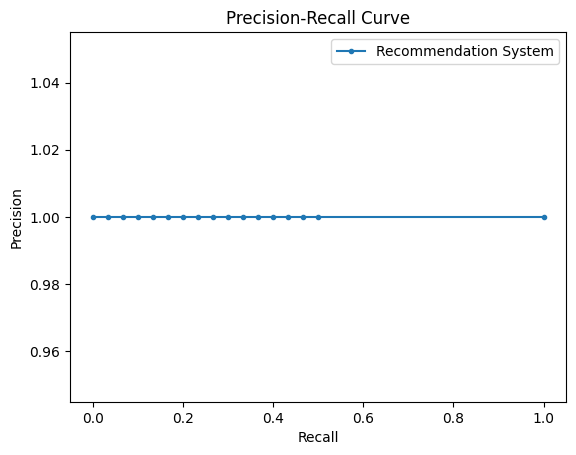

In [20]:
# Evaluate recommendations function
def evaluate_recommendations(test_data):
    test_df = pd.DataFrame(test_data)
    test_df['combined_features'] = test_df['genre'] + ' ' + test_df['director'] + ' ' + test_df['description']
    test_matrix = tfidf.transform(test_df['combined_features'])

    # Predict similarity scores
    sim_scores = linear_kernel(test_matrix, tfidf_matrix)

    # Flatten the matrix and compute MSE
    true_scores = []
    pred_scores = []

    for i in range(len(test_data)):
        idx = df.index[df['title'] == test_data[i]['title']].tolist()[0]
        true_scores.extend([1] * len(df))  # Simulating true scores as 1 for simplicity
        pred_scores.extend(sim_scores[i])

    mse = mean_squared_error(true_scores, pred_scores)
    print(f"Mean Squared Error of the Recommendations: {mse}")

    # Calculate Precision-Recall Curve and AUC
    precision, recall, _ = precision_recall_curve(true_scores, pred_scores)
    auc_score = auc(recall, precision)
    print(f"AUC of Precision-Recall Curve: {auc_score}")

    # Plot Precision-Recall Curve
    plt.figure()
    plt.plot(recall, precision, marker='.', label='Recommendation System')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

# Example test data
test_data = [
    {'title': 'The Matrix', 'genre': 'Action|Sci-Fi', 'director': 'Lana Wachowski', 'description': 'A computer hacker learns from mysterious rebels...'},
    {'title': 'Avatar', 'genre': 'Action|Adventure|Fantasy', 'director': 'James Cameron', 'description': 'A paraplegic Marine dispatched to the moon Pandora...'}
]

# Evaluate the recommendation system
evaluate_recommendations(test_data)

In [18]:
# Get recommendations function
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = df.index[df['title'] == title].tolist()[0]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 5 most similar movies
    return df[['title', 'genre', 'director']].iloc[movie_indices]

# Example: Get top 5 recommendations for 'The Matrix'
print(get_recommendations('The Matrix'))

              title                      genre           director
2         Inception     Action|Sci-Fi|Thriller  Christopher Nolan
5   The Dark Knight         Action|Crime|Drama  Christopher Nolan
11    Jurassic Park  Adventure|Sci-Fi|Thriller   Steven Spielberg
8      Forrest Gump              Drama|Romance    Robert Zemeckis
10        Gladiator     Action|Adventure|Drama       Ridley Scott
